In [1]:
import pandas as pd

In [2]:
df_embeddings = pd.read_pickle('../data/leg55_k_means.pkl')

In [3]:
df_embeddings.head()

,urls,embeddings,classes,cluster_kmeans,distance
0,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.17480865, 0.24839097, 0.018389545, 0.398058...",74385_b,8,0.016398
1,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.07091311, 0.04615592, 0.0, 6.4110007, 3.386...",74385_b,134,0.085021
4,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.10499452, 2.5098183, 0.0, 5.429726, 0.61141...",74385_b,134,0.071436
5,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.017898438, 1.6189704, 0.0022666005, 5.99468...",74385_b,134,0.084874
6,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.02720209, 4.4259987, 0.006993143, 5.375417,...",74385_b,134,0.071801


## Distance exploration

In [4]:
mean = df_embeddings.distance.mean()
std = df_embeddings.distance.std()

In [12]:
import matplotlib.pyplot as plt
import numpy as np

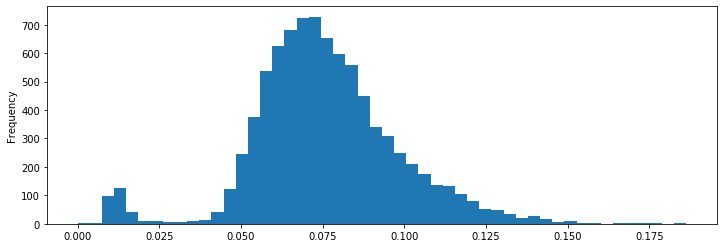

In [16]:
df_embeddings.distance.plot.hist(bins=50, figsize=(12,4))

In [22]:
mean+2*std

0.12115523402777553

In [24]:
np.mean(df_embeddings.distance<=mean+2*std)

0.9680481592961334

In [39]:
greatest_dist = df_embeddings.loc[df_embeddings.distance>mean+2*std].sort_values('distance',ascending=False)

In [48]:
i = -1
to_delete = []
from IPython.display import Image

104: /home/paulo/Documentos/slnp_faces_leg_55/73535_b/4_0.jpg d: 0.13358288485927783


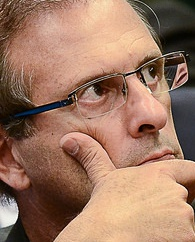

In [172]:
i = i+1
print(f'{i}: {greatest_dist.urls.values[i]} d: {greatest_dist.distance.values[i]}')
Image(greatest_dist.urls.values[i])

In [158]:
to_delete.append(greatest_dist.urls.values[i])

In [174]:
len(to_delete)

19

## Saving

In [188]:
senet50 = pd.read_pickle('../data/leg55_senet50.pkl')

In [191]:
senet50.loc[~senet50.urls.isin(to_delete)].to_pickle('../data/leg55_senet50.pkl')

In [192]:
resnet50 = pd.read_pickle('../data/leg55_resnet50.pkl')

In [194]:
resnet50.loc[~resnet50.urls.isin(to_delete)].to_pickle('../data/leg55_resnet50.pkl')

In [195]:
vgg16 = pd.read_pickle('../data/leg55_vgg16.pkl')

In [197]:
vgg16.loc[~vgg16.urls.isin(to_delete)].to_pickle('../data/leg55_vgg16.pkl')